In [1]:
import numpy as np 
import pickle
import scipy.io as sio
import scipy.sparse as ss 

#import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.preprocessing import binarize
from sklearn.svm import LinearSVC, NuSVC, SVC 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from collections import defaultdict 
import operator


np.random.seed(12345)

In [2]:
# training data:
# train_feats = BOW linguistic features
# train_image_feats = BOC image categorical features
# train_y = FOILED or NOT FOILED => IF FOILED = 1, else 0
train_feats = sio.mmread('data/train_feats.mtx')
train_image_feats = sio.mmread('data/train_image_feats.mtx')
train_target = np.array(sio.mmread('data/train_y.mtx').todense()).tolist()[0]
#############
# validation data: Same pattern as training; 
# The testing data comes from the karpathy 5k validation set only. 
val_feats = sio.mmread('data/test_feats.mtx')
val_image_feats = sio.mmread('data/test_image_feats.mtx')
val_target = np.array(sio.mmread('data/test_y.mtx').todense()).tolist()[0]

In [3]:
# Data processing, concatinating images with
# linguistic features and image features 
#X_train = ss.hstack([(train_feats), train_image_feats])
print train_image_feats.shape
X_train = ss.hstack([binarize(train_feats), binarize(train_image_feats)])

#X_val = ss.hstack([(val_feats), val_image_feats])
X_val = ss.hstack([binarize(val_feats), binarize(val_image_feats)])

Y_train = np.array(train_target)
Y_test = np.array(val_target)

(306458, 80)


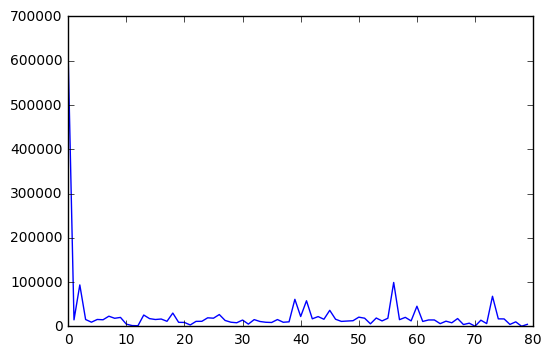

(78, 429.0)

In [5]:
#categories = binarize(train_image_feats).sum(axis=0).tolist()[0]
categories = (train_image_feats).sum(axis=0).tolist()[0]
plt.plot(categories)
plt.show()
np.array(categories).argmin(), categories[np.array(categories).argmin()]



In [7]:
#np.unique(.todense())
unique_stuff = np.vstack({tuple(row) for row in np.array(binarize(train_image_feats).todense())})


unique_arrays = {}
for row in np.array(binarize(train_image_feats).todense()):
    #unique_arrays[tuple(row)] += 1 
    if tuple(row) not in unique_arrays:
        unique_arrays[tuple(row)] = 1
    else:
        unique_arrays[tuple(row)] += 1 

sorted_unique_arrays = sorted(unique_arrays.items(), key=operator.itemgetter(1))


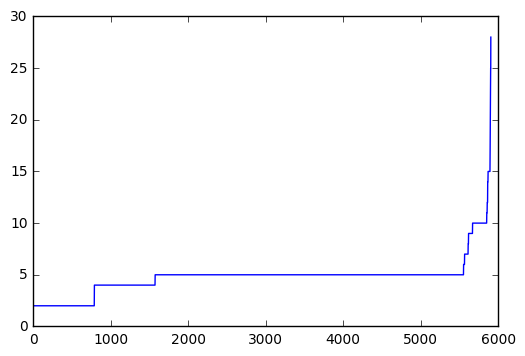

5906 2 28


In [8]:
unique_stuff = np.vstack({tuple(row) for row in np.array(binarize(val_image_feats).todense())})


unseen = {}
for row in np.array(binarize(val_image_feats).todense()):
    #unique_arrays[tuple(row)] += 1 
    if tuple(row) in unseen:
        unseen[tuple(row)] += 1  
    elif tuple(row) not in unique_arrays:
        unseen[tuple(row)] = 1

sorted_unseen = sorted(unseen.items(), key=operator.itemgetter(1))
unseen_plotting = [a[1] for a in sorted_unseen]
plt.plot(unseen_plotting)
plt.show()
print len(unseen), np.array(unseen_plotting).min(), np.array(unseen_plotting).max()



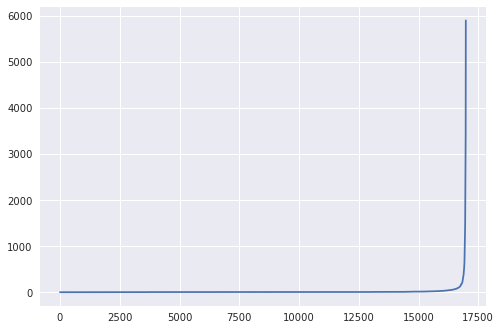

5900 2


In [90]:
numbers_only = [a[1] for a in sorted_unique_arrays]
plt.plot(numbers_only)
plt.show()
print np.array(numbers_only).max(), np.array(numbers_only).min() 

In [101]:
unique_stuff = np.vstack({tuple(row) for row in np.array((train_image_feats).todense())})


unique_arrays = {}
for row in np.array((train_image_feats).todense()):
    #unique_arrays[tuple(row)] += 1 
    if tuple(row) not in unique_arrays:
        unique_arrays[tuple(row)] = 1
    else:
        unique_arrays[tuple(row)] += 1 

sorted_unique_arrays = sorted(unique_arrays.items(), key=operator.itemgetter(1))


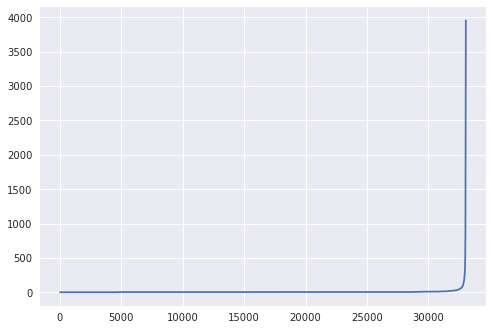

3953 2


In [92]:
numbers_only = [a[1] for a in sorted_unique_arrays]
plt.plot(numbers_only)
plt.show()
print np.array(numbers_only).max(), np.array(numbers_only).min() 

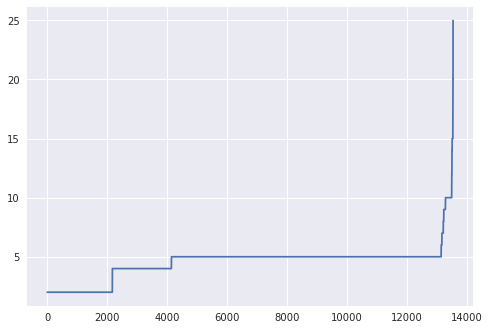

13530 2 25


(150556, 80)

In [111]:
unique_stuff = np.vstack({tuple(row) for row in np.array((val_image_feats).todense())})


unseen = {}
for row in np.array((val_image_feats).todense()):
    #unique_arrays[tuple(row)] += 1 
    if tuple(row) in unseen:
        unseen[tuple(row)] += 1  
    elif tuple(row) not in unique_arrays:
        unseen[tuple(row)] = 1

sorted_unseen = sorted(unseen.items(), key=operator.itemgetter(1))
unseen_plotting = [a[1] for a in sorted_unseen]
plt.plot(unseen_plotting)
plt.show()
print len(unseen), np.array(unseen_plotting).min(), np.array(unseen_plotting).max()

val_image_feats.shape

In [196]:
test_samples = dict([(w.strip().split()[0], np.array(map(float, w.strip().split()[1:]))) for
               w in open('data/mscoco_boc_gt_val2014.txt')])
unseen = {}
for key, value in test_samples.items():
    #unique_arrays[tuple(row)] += 1 
    if key in unseen:
    #    unseen[tuple(row)] += 1  
        print seen
    elif tuple(value) not in unique_arrays:
        unseen[key] = value
    
vocab = [r.strip().split()[1] for r in open('mscoco_boc_gt.vocab')]
#print len(test_sample)
print len(unseen)

with open('data/mscoco_boc_gt_unseen.txt', 'w') as f:
    for k,v in unseen.items():
        f.write('%s %s\n' %(k, ' '.join(map(str, v))))
        
with open('data/mscoco_boc_ft_unseen_categories.txt', 'w') as f:
    for k, v in unseen.items():
        f.write('%s %s\n' %(str(int(k.split('.jpg')[0].split('COCO_val2014_')[1])), ' '.join((np.array(vocab)[v >= 1]).tolist())))

training_image_feats = normalize(train_image_feats)
#train_image_feats = train_image_feats.todense()

#with open('data/mscoco_boc_ft_unseen_closest_match.txt', 'w') as f:
#    for k, v in unseen.items():
#        f.write('%s %s\n' %(str(int(k.split('.jpg')[0].split('COCO_val2014_')[1])), ' '.join((np.array(vocab)[np.array(train_image_feats[training_image_feats.dot(normalize(v)[0]).argmax()])[0] > 0]).tolist())))


17236


In [209]:
#training_image_feats.dot(normalize(v)).argmax()
#(np.array(vocab)[np.array(train_image_feats[training_image_feats.dot(normalize(v)[0]).argmax()])[0] > 0]).tolist()
#train_image_feats = train_image_feats.todense()
print train_image_feats.shape
print training_image_feats.dot(normalize(v)[0]).argsort()[::-1][:6]
print(np.array(vocab)[np.array(train_image_feats[34284])[0] > 0]).tolist()
print train_image_feats[34284]
print(np.array(vocab)[np.array(train_image_feats[34286])[0] > 0]).tolist()
print train_image_feats[34286]
print(np.array(vocab)[np.array(train_image_feats[34287])[0] > 0]).tolist()
print np.array(train_image_feats[34287])
print 'odd'
print(np.array(vocab)[np.array(train_image_feats[233864])[0] > 0]).tolist()
print np.array(train_image_feats[233864])

print (np.array(vocab)[v >= 1]).tolist()
print v
print k


(306458, 80)
[ 34284  34286  34287  34283  34285 233864]
['person', 'bottle', 'bowl', 'banana', 'apple', 'orange', 'cake', 'chair', 'potted_plant', 'dining_table']
[[ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  9.  0.  0.  0.  0.  0.  2.  2.  3.  0.  2.  0.  0.  0.  0.
   0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]]
['person', 'bottle', 'bowl', 'banana', 'apple', 'orange', 'cake', 'chair', 'potted_plant', 'dining_table']
[[ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  9.  0.  0.  0.  0.  0.  2.  2.  3.  0.  2.  0.  0.  0.  0.
   0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]]
['person', 'bottle', 'bowl', 'banana', 'apple', 'orange', 'cake',

/home/pranava/miniconda2/envs/pytorch2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [207]:
tif= dict([(tuple(map(float, r.strip().split()[1:])), r.strip().split()[0]) for r 
                      in open('data/mscoco_boc_gt_train2014.txt')])

print train_image_feats[34284].tolist()[0]
print tif[tuple(train_image_feats[34286].tolist()[0])]

[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 3.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
COCO_train2014_000000069048.jpg


In [ ]:
(tuple(map(float, r.strip().split()[1:]))

In [46]:
# Logistic Regression with 'l1' penalty
logistic = LogisticRegression(penalty='l1')
logistic.fit(X_train, Y_train)
print 'Accuracy = ', metrics.accuracy_score(Y_test, logistic.predict(X_val))
target_names = ['REAL', 'FAKE']
print metrics.classification_report(Y_test, logistic.predict(X_val), 
                                    target_names=target_names)

Accuracy =  0.757631711788
             precision    recall  f1-score   support

       REAL       0.77      0.73      0.75     75278
       FAKE       0.75      0.78      0.76     75278

avg / total       0.76      0.76      0.76    150556



In [47]:
# Linear Support Vector Classifier with l2 regularizer and hinge loss
linearsvc = LinearSVC(penalty='l2', loss='hinge', verbose=1)
linearsvc.fit(X_train, Y_train)
print 'Accuracy = ', metrics.accuracy_score(Y_test, linearsvc.predict(X_val))
target_names = ['REAL', 'FAKE']
print metrics.classification_report(Y_test, linearsvc.predict(X_val), 
                                    target_names=target_names)

[LibLinear]Accuracy =  0.758966763198
             precision    recall  f1-score   support

       REAL       0.80      0.69      0.74     75278
       FAKE       0.73      0.83      0.77     75278

avg / total       0.76      0.76      0.76    150556



In [43]:
# Decision tree classifier
decisiontree = DecisionTreeClassifier(random_state=0)
decisiontree.fit(X_train, Y_train)
print 'Accuracy = ', metrics.accuracy_score(Y_test, decisiontree.predict(X_val))
target_names = ['REAL', 'FAKE']
print metrics.classification_report(Y_test, decisiontree.predict(X_val), 
                                    target_names=target_names)

Accuracy =  0.960273918011
             precision    recall  f1-score   support

       REAL       0.96      0.96      0.96     75278
       FAKE       0.96      0.96      0.96     75278

avg / total       0.96      0.96      0.96    150556



In [44]:
# standard Gradient Boosting Classifier 
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
print 'Accuracy = ', metrics.accuracy_score(Y_test, gb.predict(X_val.toarray()))
target_names = ['REAL', 'FAKE']
print metrics.classification_report(Y_test, gb.predict(X_val.toarray()), 
                                    target_names=target_names)

Accuracy =  0.824098674247
             precision    recall  f1-score   support

       REAL       0.75      0.97      0.85     75278
       FAKE       0.95      0.68      0.79     75278

avg / total       0.85      0.82      0.82    150556



In [45]:
# extremely randomized tree classifier.
ert = ExtraTreeClassifier(splitter='best')
ert.fit(X_train, Y_train)
print 'Accuracy = ', metrics.accuracy_score(Y_test, ert.predict(X_val.toarray()))
target_names = ['REAL', 'FAKE']
print metrics.classification_report(Y_test, ert.predict(X_val), 
                                    target_names=target_names)

Accuracy =  0.768750498154
             precision    recall  f1-score   support

       REAL       0.77      0.77      0.77     75278
       FAKE       0.77      0.76      0.77     75278

avg / total       0.77      0.77      0.77    150556



In [ ]:
pickle.dump(decisiontree, open('decisiontreeclassifiermodel.pkl', 'w'))

In [4]:
# MLP Classifier as in the FOIL paper
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
mlp.fit(X_train, Y_train)
print 'Accuracy = ', metrics.accuracy_score(Y_test, mlp.predict(X_val.toarray()))
target_names = ['REAL', 'FAKE']
print metrics.classification_report(Y_test, mlp.predict(X_val), 
                                    target_names=target_names)

ValueError: Found input variables with inconsistent numbers of samples: [306458, 106691]

In [221]:
print metrics.classification_report(Y_test, mlp.predict(X_val), 
                                    target_names=target_names, digits=4)

             precision    recall  f1-score   support

       REAL     0.9623    0.9613    0.9618     75278
       FAKE     0.9614    0.9623    0.9618     75278

avg / total     0.9618    0.9618    0.9618    150556



In [222]:
a = mlp.predict(X_val)

In [226]:
Y_test.sum()

75278

In [229]:
a.sum() / float(Y_test.sum())

1.0009963070219718